### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

### Read and load Dataset into pandas DataFrame

In [42]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### There are missing values so we need to do median value imputation

In [45]:
df['children'].fillna(df['children'].median(),inplace=True)

In [46]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [47]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

#### Creating a target column

In [48]:
df['Total_visitors'] = df['adults'] + df['children'] + df['babies']


In [49]:
len(df['Total_visitors'].unique())

15

In [50]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [51]:
df['hotel'].value_counts()/len(df['hotel'])*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [ ]:
df.columns

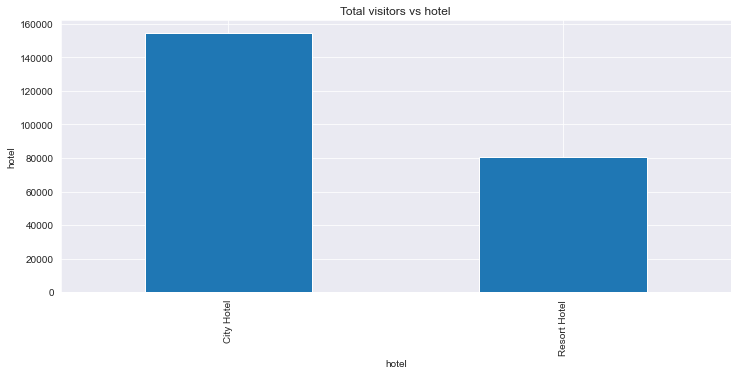

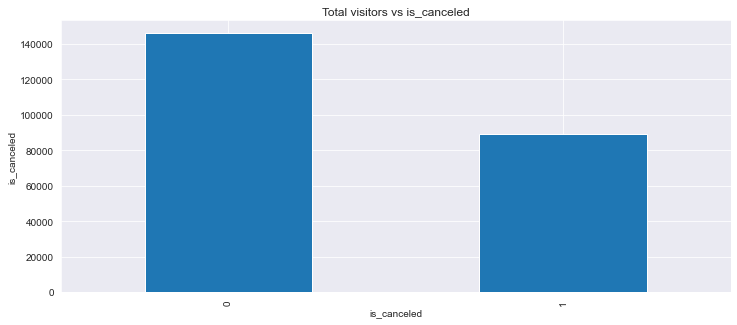

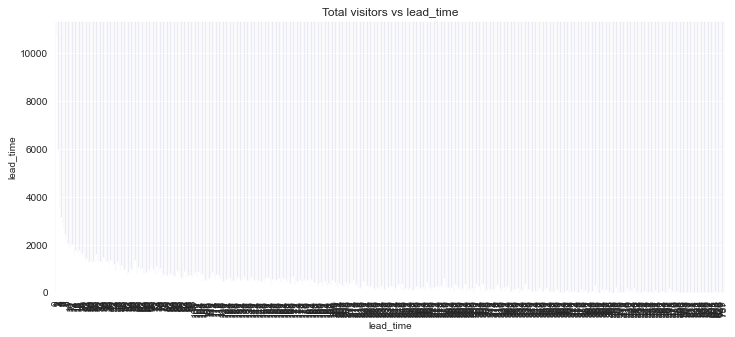

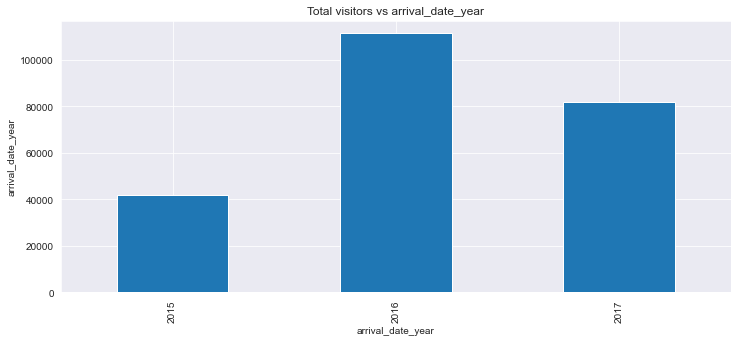

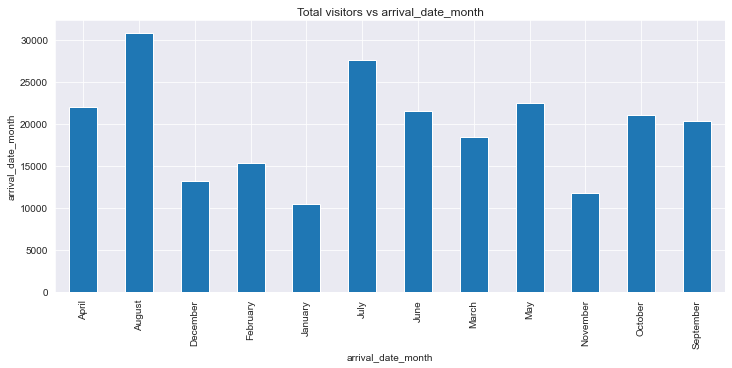

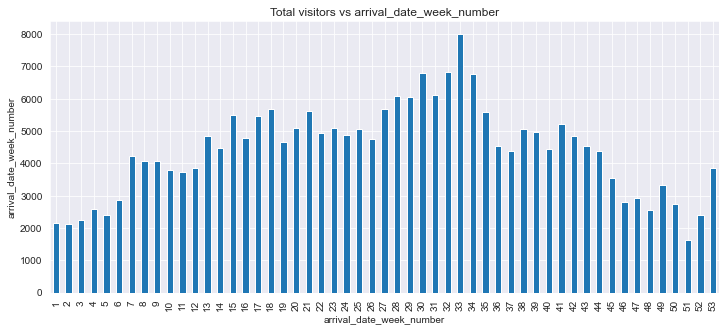

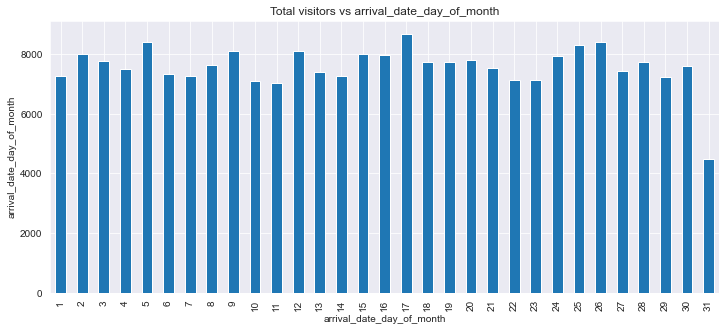

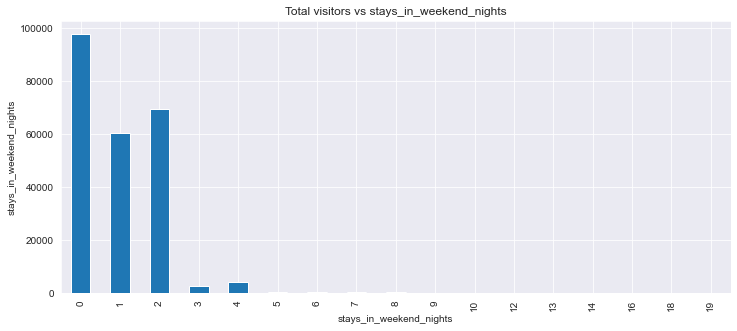

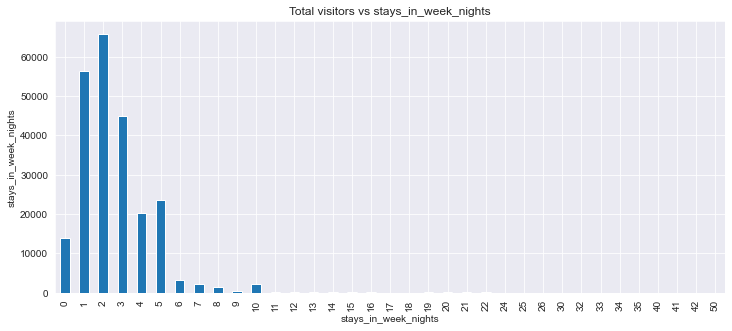

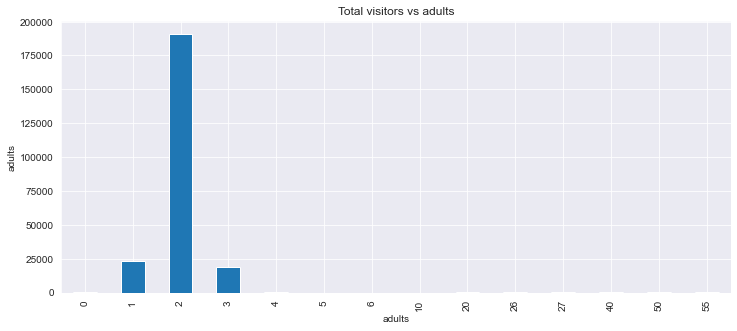

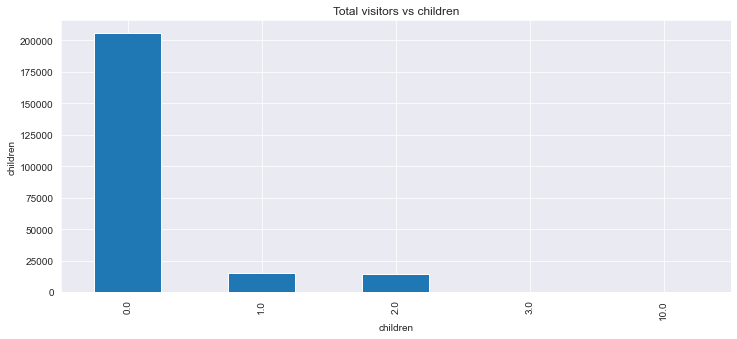

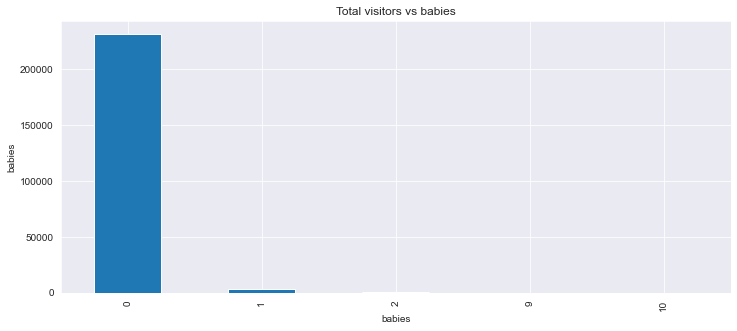

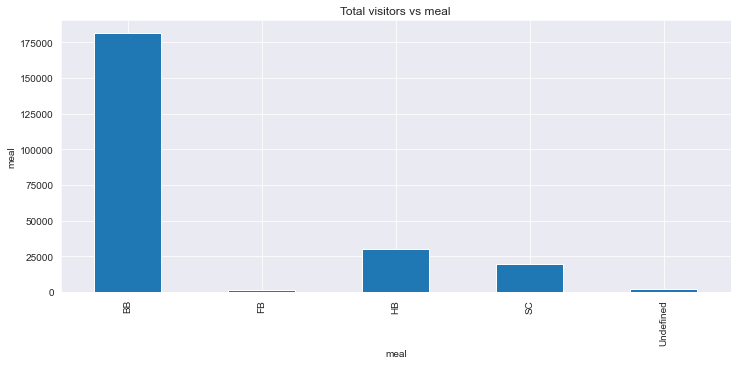

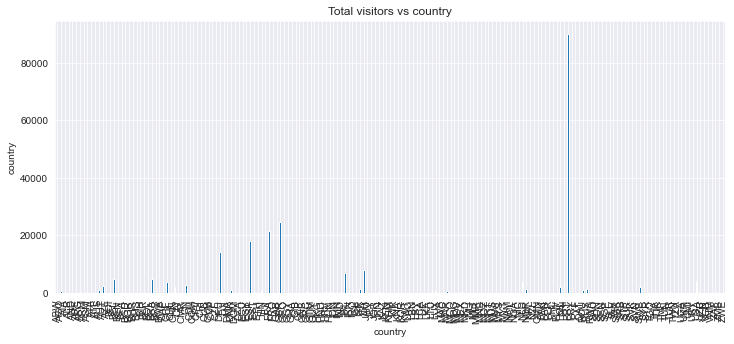

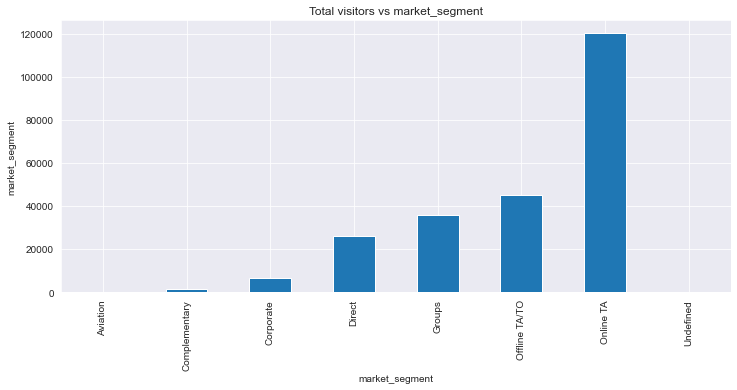

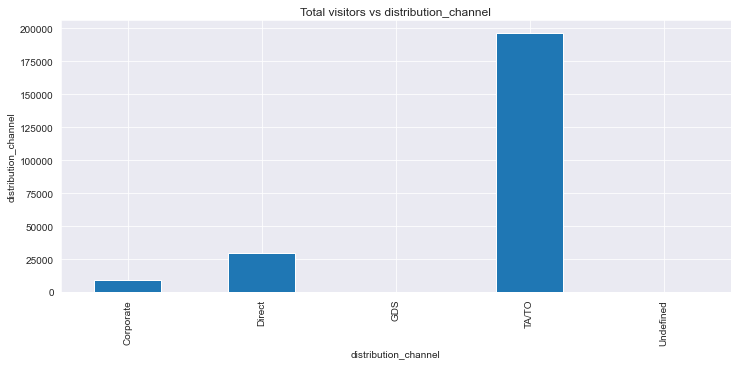

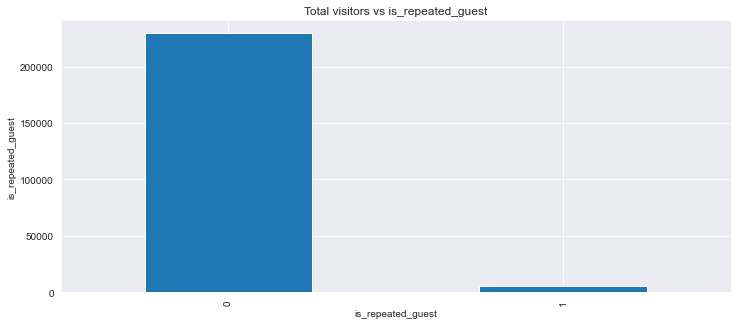

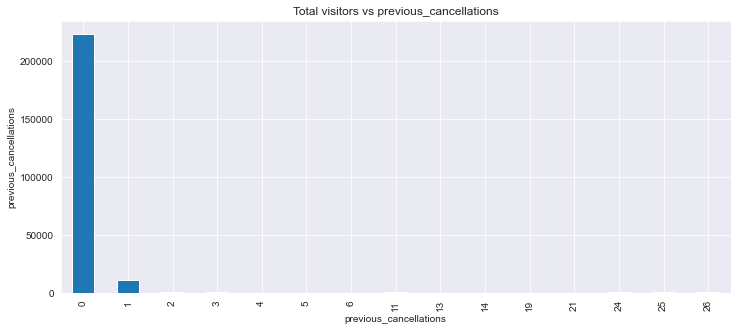

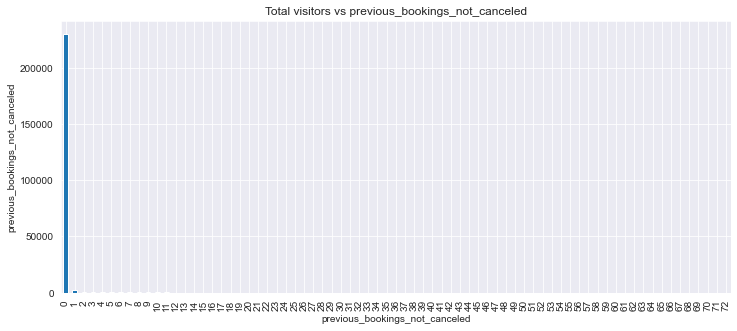

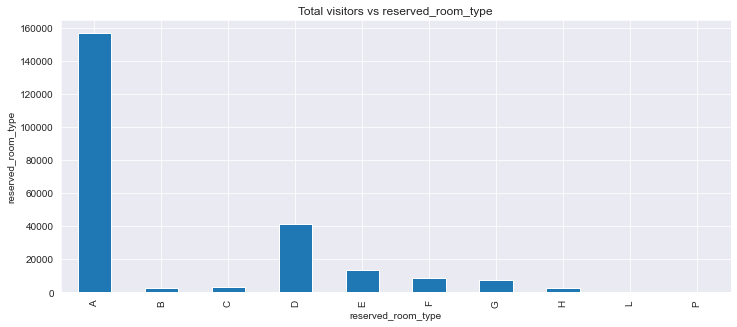

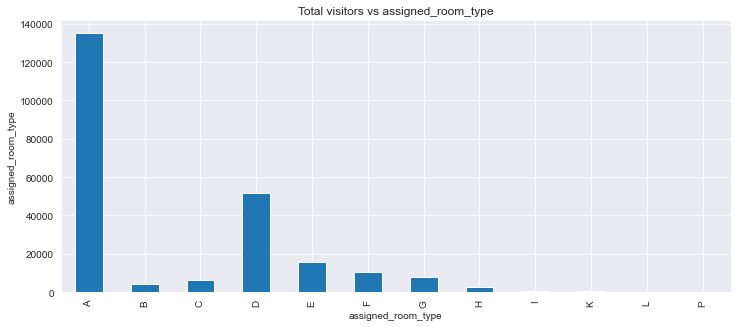

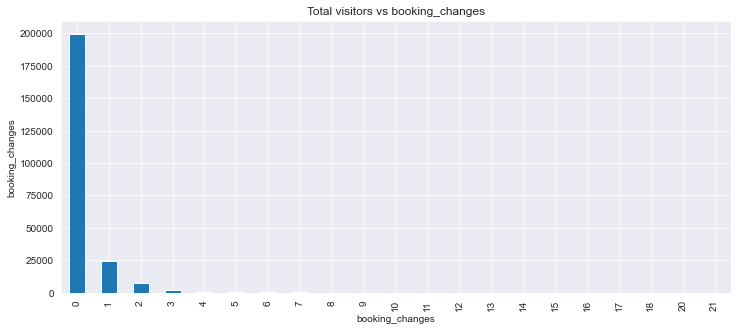

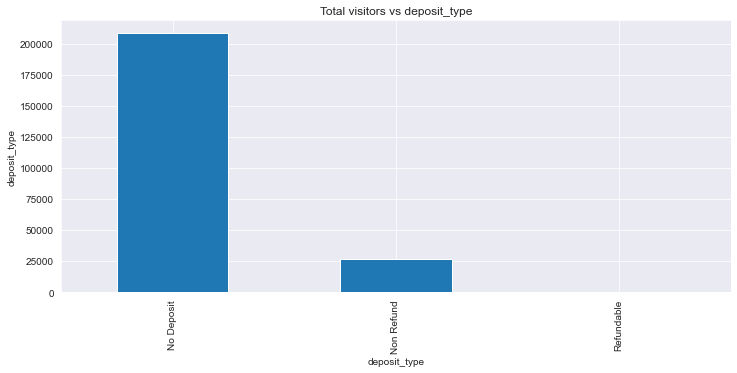

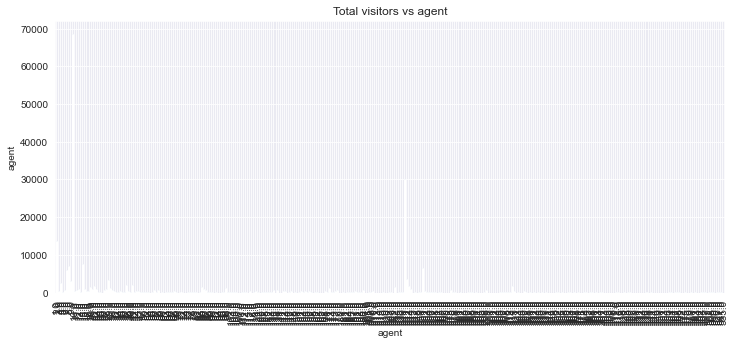

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(12,5))
    df.groupby(feature)['Total_visitors'].sum().plot.bar()
    plt.title(f'Total visitors vs {feature}')
    plt.ylabel(feature)
    plt.show()
    

#### Bivariate Analysis of Hotel and is_cancelled column

hotel         Total_visitors
City Hotel    2.0               53935
              1.0               15568
              3.0                7706
              4.0                1860
              0.0                 167
              5.0                  92
              10.0                  1
              12.0                  1
Resort Hotel  2.0               28116
              1.0                7013
              3.0                2789
              4.0                2069
              5.0                  45
              0.0                  13
              26.0                  5
              20.0                  2
              27.0                  2
              6.0                   1
              10.0                  1
              12.0                  1
              40.0                  1
              50.0                  1
              55.0                  1
Name: Total_visitors, dtype: int64


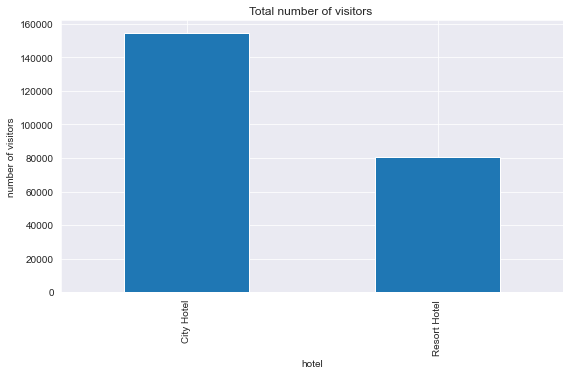

In [12]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
print(df.groupby('hotel')['Total_visitors'].value_counts())
df.groupby('hotel')['Total_visitors'].sum().plot.bar()
plt.title('Total number of visitors ')
plt.ylabel('number of visitors')
plt.show()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64


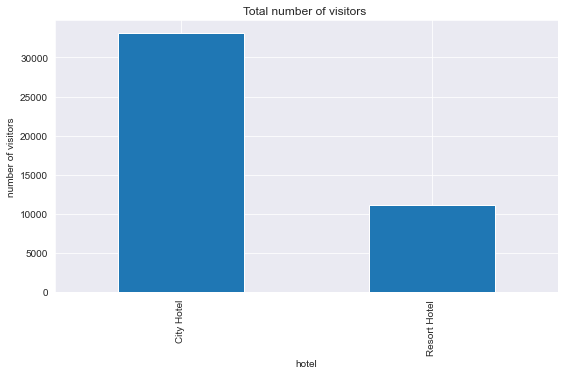

In [13]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
print(df.groupby('hotel')['is_canceled'].value_counts())
df.groupby('hotel')['is_canceled'].sum().plot.bar()
plt.title('Total number of visitors ')
plt.ylabel('number of visitors')
plt.show()

####  => 70% of the bookings in City Hotel were canceled  and 37% of bookings in resort hotel were canceled 

Text(0.5, 1.0, 'Hotel')

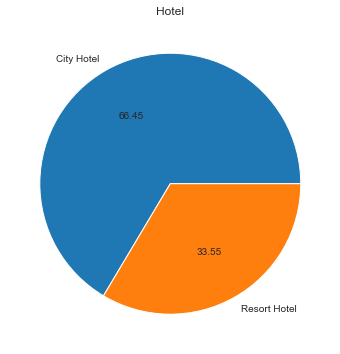

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.pie(df['hotel'].value_counts(),labels=df['hotel'].value_counts().index,autopct='%0.02f')
plt.title('Hotel')

#### One Hot Encoding 

In [15]:
dummy = pd.get_dummies(df['hotel'],prefix='hotel')
df.drop('hotel',inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_visitors,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,0,1


#### Checking outliers

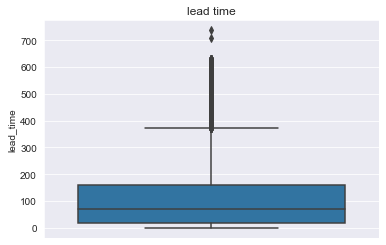

In [16]:
sns.boxplot(y=df['lead_time']);
plt.title('lead time')
plt.show()

#### Outlier Treatment

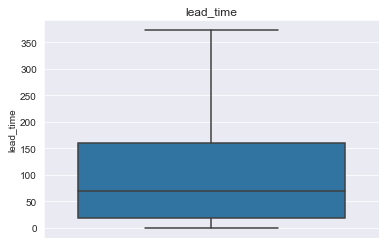

In [17]:
iqr = df['lead_time'].quantile(0.75) - df['lead_time'].quantile(0.25)
lower_range = df['lead_time'].quantile(0.25) - (iqr*1.5)
higher_range = df['lead_time'].quantile(0.75) + (iqr*1.5)
lower = df['lead_time'].quantile(0.25)
higher = df['lead_time'].quantile(0.75)
outlier_treated = np.where(df['lead_time'] > higher_range,higher,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
outlier_treated = np.where(df['lead_time'] < lower_range,lower,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
#verification
sns.boxplot(y = df['lead_time'])
plt.title('lead_time')
plt.show()

In [18]:
df[['arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month']].isnull().sum()

arrival_date_year            0
arrival_date_week_number     0
arrival_date_day_of_month    0
dtype: int64

#### Checking for Outliers

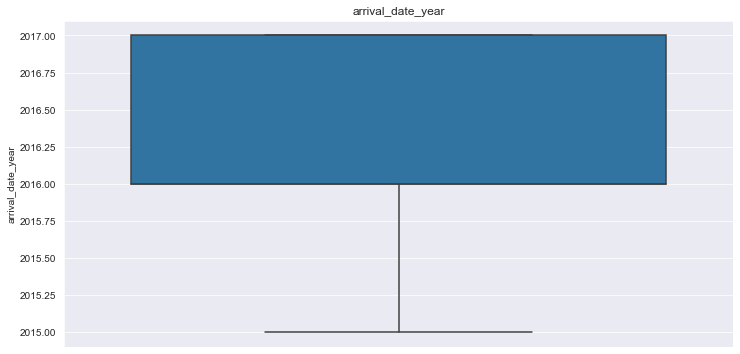

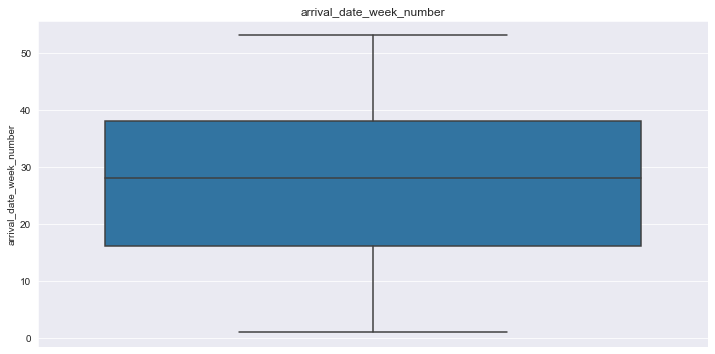

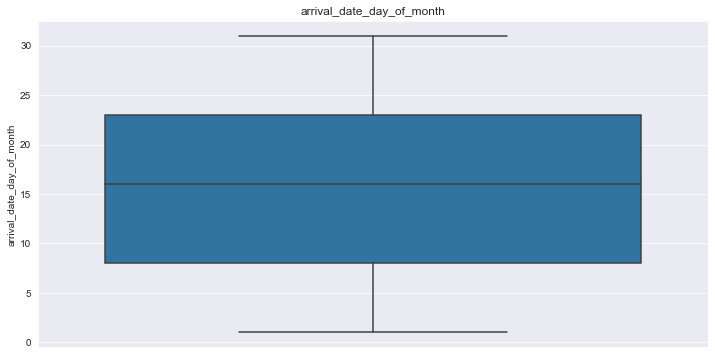

In [19]:
for feature in ['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month']:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.show()

In [20]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_visitors,hotel_City Hotel,hotel_Resort Hotel
0,0,342.0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
1,0,160.0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
2,0,7.0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
3,0,13.0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
4,0,14.0,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,0,1


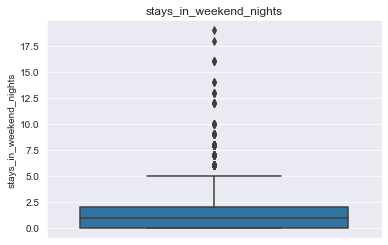

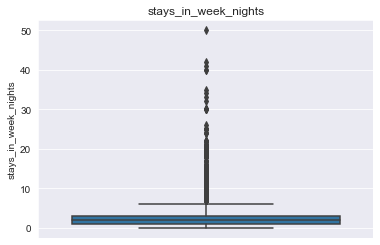

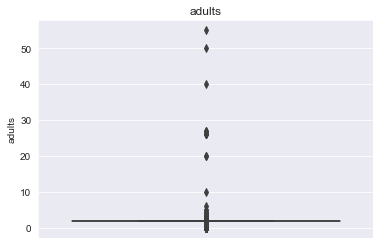

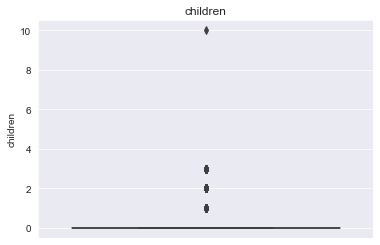

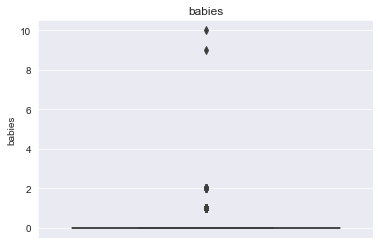

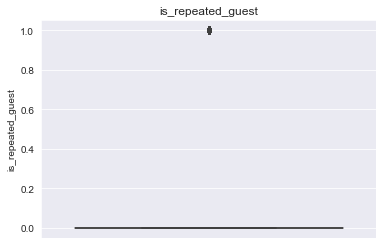

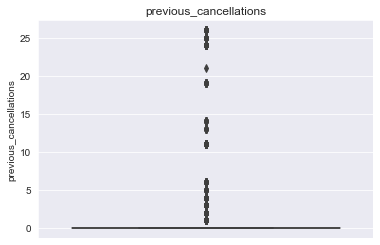

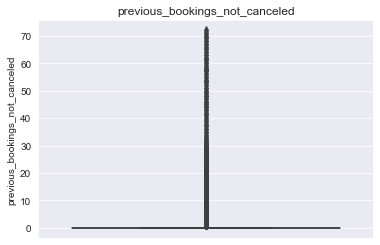

In [21]:
for feature in ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled']:
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.show()

In [22]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [23]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

#### There are missing values so we need to do median value imputation

In [24]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [25]:
df['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [26]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

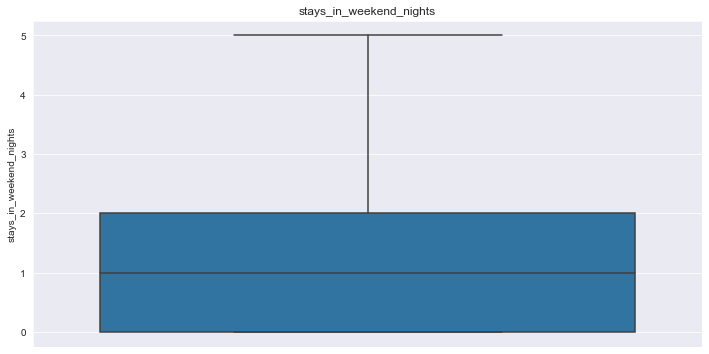

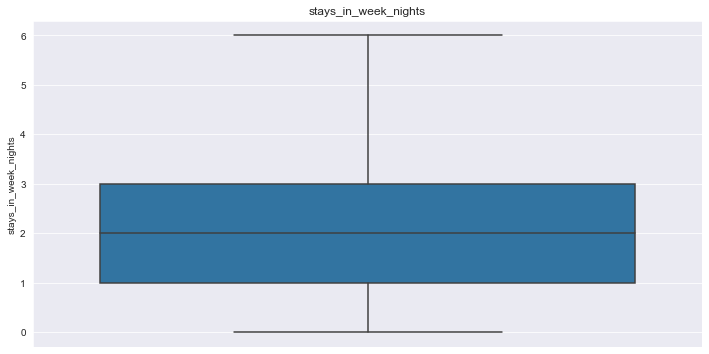

In [27]:
# Outliers treatment
for feature in ['stays_in_weekend_nights', 'stays_in_week_nights']:
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*iqr)
    higher_range = df[feature].quantile(0.75) + (1.5*iqr)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    outlier_treated = np.where(df[feature] > higher_range,higher,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    outlier_treated = np.where(df[feature] < lower_range,lower,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    ## Verification
    plt.figure(figsize=(12,6))
    sns.boxplot(y = df[feature])
    plt.title(feature)
    plt.show()
    

In [28]:
df[['booking_changes', 'agent']].isnull().mean()*100

booking_changes     0.000000
agent              13.686238
dtype: float64

In [29]:
df['agent'].fillna(df['agent'].median(),inplace=True)

In [30]:
df['company'].isnull().mean()*100

94.30689337465449

In [31]:
df.drop('company',inplace=True,axis=1)

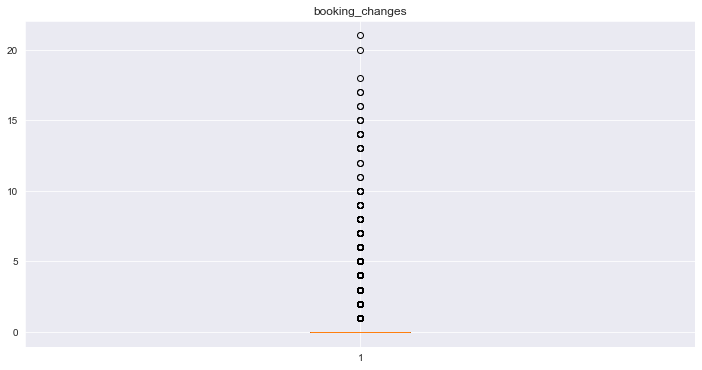

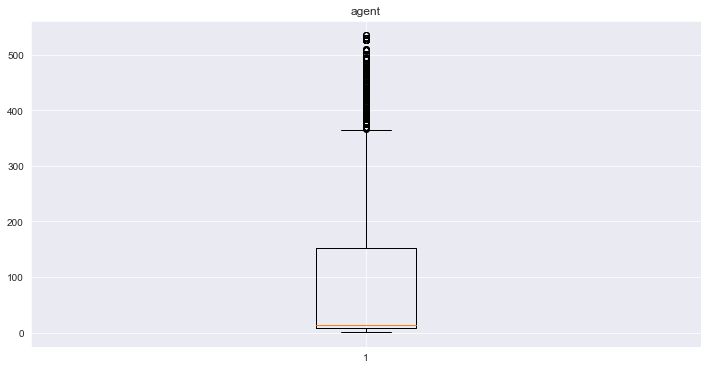

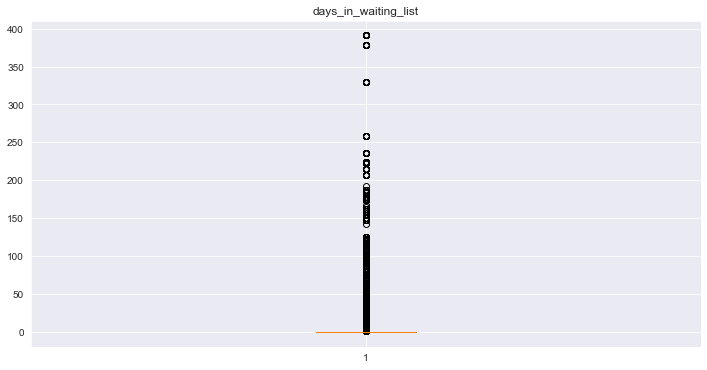

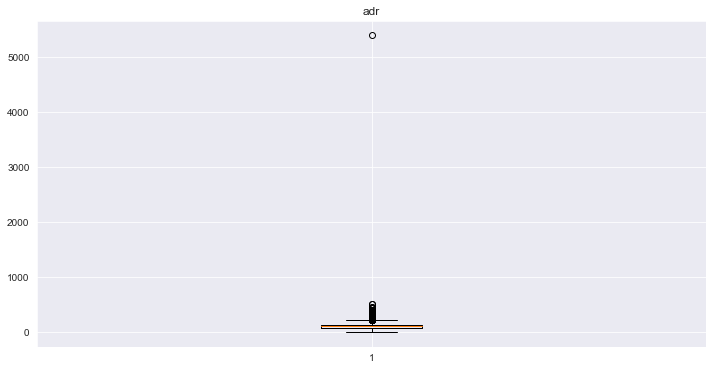

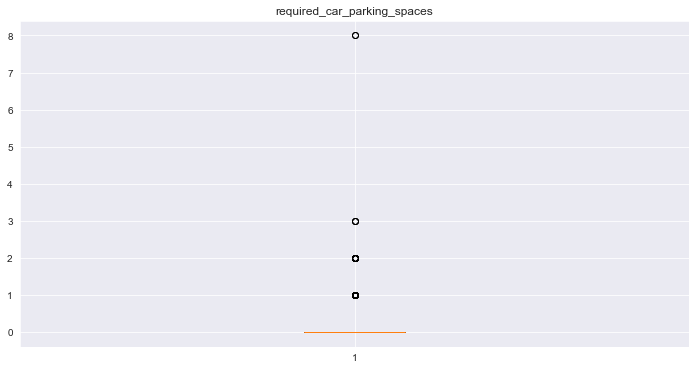

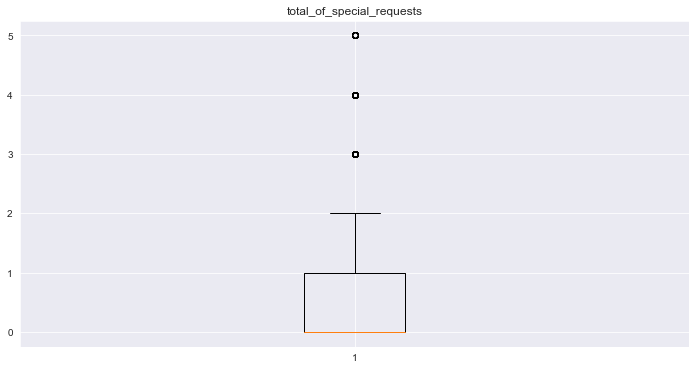

In [32]:
for feature in ['booking_changes', 'agent','days_in_waiting_list', 'adr', 'required_car_parking_spaces','total_of_special_requests']:
    plt.figure(figsize=(12,6))
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [33]:
len(df['booking_changes'].unique())

21

In [34]:
len(df['days_in_waiting_list'].unique())

128

In [35]:
len(df['adr'].unique())

8879

In [36]:
len(df['required_car_parking_spaces'].unique())

5

In [37]:
len(df['total_of_special_requests'].unique())

6

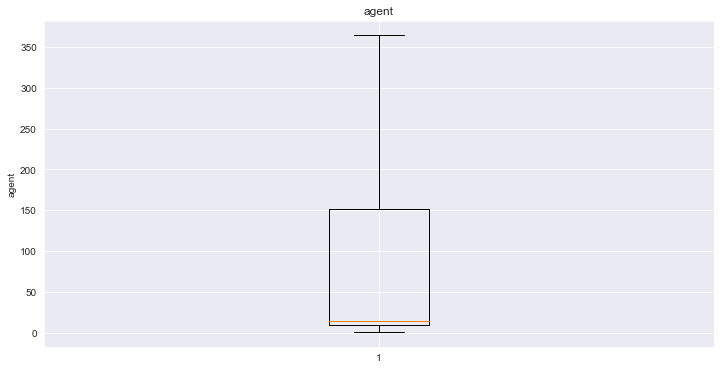

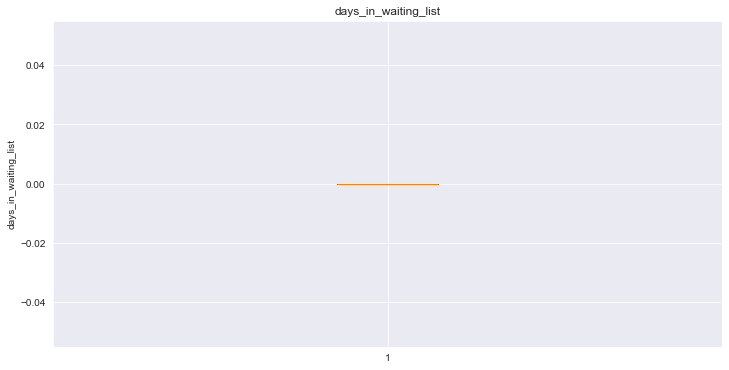

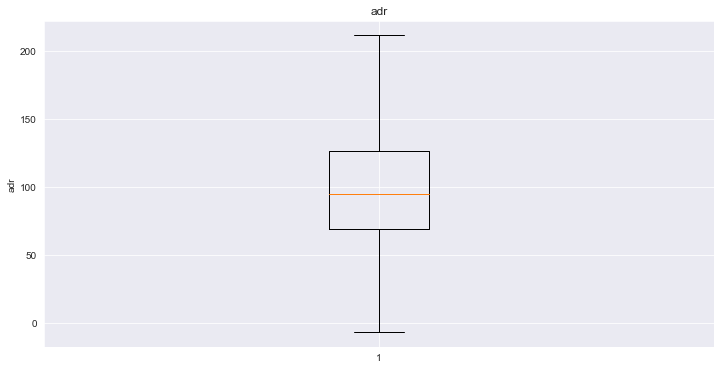

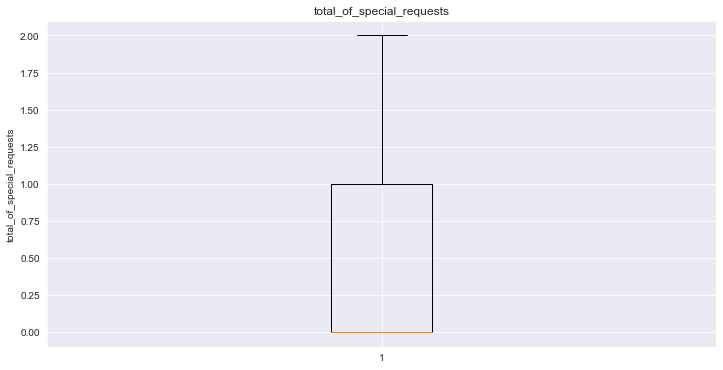

In [38]:
for feature in [ 'agent','days_in_waiting_list', 'adr','total_of_special_requests']:
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*iqr)
    higher_range = df[feature].quantile(0.75) + (1.5*iqr)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    treated = np.where(df[feature] < lower_range,lower,df[feature])
    df[feature] = pd.DataFrame(treated)
    treated = np.where(df[feature] > higher_range,higher,df[feature])
    df[feature] = pd.DataFrame(treated)
    ## CROSS VERIFICATION
    plt.figure(figsize=(12,6))
    plt.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [39]:
categorical_cols.remove('hotel')

In [40]:
for feature in categorical_cols:
    print(df[feature].value_counts())
    print()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
ASM        1
BHS        1
BDI        1
PYF        1
Name: country, Length: 177, dtype: int64

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C  